In [11]:
import sys
sys.path.insert(0, '../src/')
from forum_corpus_reader import ForumCorpusReader
from nltk.util import ngrams

Taking inspiration from: http://blog.alejandronolla.com/2013/05/20/n-gram-based-text-categorization-categorizing-text-with-python/

In [9]:
fam_corpus = ForumCorpusReader('../data/', r'familjeliv-sex25.xml')
fam_words = fam_corpus.words()
fam_trigrams = list(ngrams(fam_words[:50], 3))
ngrams_statistics = {}
for trigram in fam_trigrams:
  if not trigram in ngrams_statistics:
      ngrams_statistics.update({trigram:1})
  else:
      ngram_occurrences = ngrams_statistics[trigram]
      ngrams_statistics.update({trigram:ngram_occurrences+1})

In [12]:
ngrams_statistics

{(',', 'är', 'väl'): 1,
 ('.', 'mår', 'verkligen'): 1,
 ('...', '?', '?'): 1,
 ('?', '?', 'Så'): 1,
 ('?', 'Dit', 'hade'): 1,
 ('?', 'Så', 'länge'): 1,
 ('Dit', 'hade', 'vi'): 1,
 ('Ofta', 'hoppar', 'jag'): 1,
 ('Så', 'länge', 'man'): 1,
 ('allt', 'okej', '?'): 1,
 ('annan', ',', 'är'): 1,
 ('att', 'få', 'kiss'): 1,
 ('att', 'säjja', '...'): 1,
 ('av', 'att', 'få'): 1,
 ('bara', 'iväg', 'till'): 1,
 ('bra', 'av', 'att'): 1,
 ('fel', 'hål', 'så'): 1,
 ('få', 'kiss', 'i'): 1,
 ('gör', 'nåt', 'som'): 1,
 ('hade', 'vi', 'aldrig'): 1,
 ('hoppar', 'jag', 'bara'): 1,
 ('hål', 'så', 'att'): 1,
 ('i', 'fel', 'hål'): 1,
 ('inte', 'gör', 'nåt'): 1,
 ('iväg', 'till', 'toan'): 1,
 ('jag', 'bara', 'iväg'): 1,
 ('kiss', 'i', 'fel'): 1,
 ('kissar', '.', 'mår'): 1,
 ('kroppen', 'bra', 'av'): 1,
 ('länge', 'man', 'inte'): 1,
 ('man', 'inte', 'gör'): 1,
 ('mig', 'och', 'kissar'): 1,
 ('mår', 'verkligen', 'kroppen'): 1,
 ('nån', 'annan', ','): 1,
 ('nåt', 'som', 'skadar'): 1,
 ('och', 'kissar', '.'): 1,
 

In [65]:
from nltk.corpus import stopwords
class ForumProfile():
    def __init__(self, forum_corpus, ngram_order):
        self.corpus = forum_corpus
        self.ngram_order = ngram_order
        self.ngrams = self.make_ngrams()
        self.ngram_distribution = FreqDist(self.ngrams)
    
    def make_ngrams(self):
        # Reject words that are not alphabetical and reject stopwords
        swedish_stopwords = stopwords.words('swedish')
        corpus_words = [word.lower() for word in self.corpus.words() 
                        if (word.isalpha() 
                        and word not in swedish_stopwords)]
        return list(ngrams(corpus_words, self.ngram_order))
    
    def count_ngrams(self):
        # Not used, FreqDist from NLTK makes this redundant
        if self.ngrams is None:
            return
        
        for ngram in self.ngrams:
          if not ngram in self.ngram_distribution:
              self.ngram_distribution.update({ngram:1})
          else:
              ngram_occurrences = self.ngram_distribution[ngram]
              self.ngram_distribution.update({ngram:ngram_occurrences+1})

In [ ]:
fam_corpus = ForumCorpusReader('../data/', r'familjeliv-sexsamlevnad.xml')
fam_profile = ForumProfile(fam_corpus, 3)

In [72]:
fam_profile.ngram_distribution.N()

607785

In [73]:
fam_profile.ngram_distribution.most_common(20)

[(('anonym', 'skrev', 'följande'), 128),
 (('skrev', 'följande', 'anonym'), 89),
 (('skrev', 'följande', 'jag'), 66),
 (('å', 'andra', 'sidan'), 59),
 (('jag', 'vill', 'bara'), 57),
 (('www', 'familjeliv', 'se'), 50),
 (('familjeliv', 'se', 'forum'), 48),
 (('t', 'o', 'm'), 46),
 (('skrev', 'följande', 'ja'), 43),
 (('out', 'of', 'bed'), 41),
 (('devil', 'says', 'aw'), 41),
 (('he', 's', 'up'), 41),
 (('i', 'get', 'out'), 41),
 (('shit', 'he', 's'), 41),
 (('the', 'morning', 'the'), 41),
 (('the', 'devil', 'says'), 41),
 (('bed', 'in', 'the'), 41),
 (('in', 'the', 'morning'), 41),
 (('morning', 'the', 'devil'), 41),
 (('aw', 'shit', 'he'), 41)]

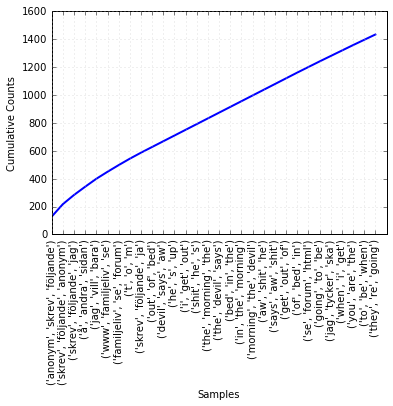

In [74]:
fam_profile.ngram_distribution.plot(30, cumulative=True)

In [75]:
fam_profile.ngram_distribution.hapaxes()

[('ser', 'andra', 'gör'),
 ('sysselsättning', 'ägna', 'aha'),
 ('upplever', 'även', 'får'),
 ('upprättelse', 'jag', 'missade'),
 ('oralsex', 'gärna', 'får'),
 ('vill', 'samtidigt', 'tycker'),
 ('gjort', 'antagligen', 'kunnat'),
 ('otrohet', 'bra', 'tänker'),
 ('insikter', 'empatiska', 'grund'),
 ('det', 'kommit', 'visa'),
 ('det', 'stärker', 'ens'),
 ('säljer', 'sex', 'vill'),
 ('knulla', 'svarar', 'frågar'),
 ('vanligare', 'analsex', 'thomas'),
 ('vill', 'älskad', 'gravida'),
 ('tycker', 'jätteskönt', 'det'),
 ('o', 'annan', 'o'),
 ('onanerat', 'sätt', 'sen'),
 ('tillräckligt', 'lång', 'tjock'),
 ('realtion', 'sex', 'behöver'),
 ('gillar', 'om', 'vill'),
 ('medvetet', 'såra', 'vet'),
 ('hjälpa', 'traven', 'att'),
 ('känner', 'missat', 'nåt'),
 ('ofta', 'går', 'fenomenen'),
 ('kvinnor', 'män', 'läsa'),
 ('annat', 'men', 'tvingas'),
 ('ända', 'in', 'själen'),
 ('annan', 'säger', 'frågan'),
 ('vill', 'njuter', 'ha'),
 ('dom', 'gör', 'förvånad'),
 ('ihopdragande', 'effekt', 'rekommenderas

In [41]:
words = FreqDist([word.lower() for word in fam_profile.corpus.words()])

In [42]:
words.hapaxes()

['jus',
 'sextur',
 'lakt',
 'genetiskt',
 'huvudregeln',
 'strömlinjeformad',
 'apelsinmer',
 'simsalabim',
 'firre',
 'hurså',
 'dödsstraff',
 'viktkurvan',
 'hormonspiraler',
 'alltdå',
 'whose',
 'upptackte',
 'sattsa',
 'huvve',
 'fleras',
 'elinelversson',
 'cybersexa',
 'snesteg',
 'kontrolera',
 'vattenlåset',
 'lagförslaget',
 'naturistanläggning',
 'bikinisäsongen',
 'rouladerna',
 '123',
 'skitsällan',
 'munkar',
 'minnesbilder',
 'invandrartjejer',
 'självcentrerad',
 'lagstiftaren',
 'dregg',
 'stjärnan',
 'obehgliga',
 'inviduellt',
 'ingångslön',
 'detbär',
 'specialisera',
 'webb',
 'nyvarande',
 'latinamerikanskt',
 'rekomendara',
 'trådstartens',
 'varlen',
 'skjorts',
 'söndagsmorgona',
 'läsningar',
 'nytvättat',
 'munnknullad',
 'direction',
 'olcykan',
 'blirgravid',
 'återvinna',
 'samlagsform',
 'tjejr',
 'läggat',
 'manken',
 'bedriver',
 'förbipasserande',
 'kvinnodominerat',
 'sexfrågan',
 'saningen',
 'julias',
 'klüft',
 'femkamp',
 'brädad',
 'finurliga',


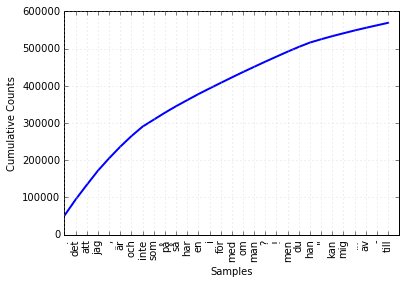

In [43]:
words.plot(30,cumulative=True)

In [6]:
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category) 
             for category in movie_reviews.categories() 
             for fileid in movie_reviews.fileids(category)]

In [57]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True